In [1]:
import datetime
import openpyxl
import glob
import os
import re
import pprint
import math
import numpy as np

In [14]:
dialog_list = []
now = datetime.datetime.now()

for xlsx_file in xlsx_files:
    # エクセルブック
    wb = openpyxl.load_workbook(xlsx_file, data_only=True)

    # エクセルシート
    ws = wb["Transcription"]

    # ヘッダーを除いて順番に読み込む
    for row in ws["H4:H1000"]: 
        if row[0].value is None:
            # print()
            break
        dialog_list.append(row[0].value)
        dialog = '\n'.join(dialog_list)

# 余計な文字をカット
# =:削除, {#}:中の文字ごと削除, <#>:中の文字ごと削除, (#):中の文字ごと削除, [#]:中の文字ごと削除, 【【:削除, 】】:削除
# JM or JF + 数字3桁: 削除
dialog = re.sub(r'=','',dialog)
dialog = re.sub(r'{.+?}','',dialog)
dialog = re.sub(r'\[.+?\]','',dialog)
dialog = re.sub(r'《.+?》','',dialog)
dialog = re.sub(r'\(.+?\)','',dialog)
dialog = re.sub(r'<.+?>','',dialog)
dialog = re.sub(r'[.+?]','',dialog)
dialog = re.sub(r'【【','',dialog)
dialog = re.sub(r'】】','',dialog)
dialog = re.sub(r'\\u3000','',dialog) 
dialog = re.sub(r'JM[0-9]{3}','',dialog)
dialog = re.sub(r'JF[0-9]{3}','',dialog)
dialog = re.sub(r'。。','。',dialog)
dialog = re.sub(r'。、','',dialog)

# 分割個数分のdialog.txtを作成
f = open('dialog(full).txt', 'w', encoding="utf-8")
f.write(dialog)

2174153

In [2]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import MeCab
import random
import sys
import io
%matplotlib inline

# path = './dialog(full)_mini.txt'
path = './dialog_mini.txt'

with io.open(path, encoding="utf-8") as f:
    text = f.read().lower()
# print('corpus length:', len(text))
text = re.sub(r'「|」|『|』','',text)
text = re.sub(r'人名|施設|地名|場所|','',text)
text = re.sub(r'。|,|、|#|ー','',text)
print(text)

# 形態素で単語単位に分割
tagger = MeCab.Tagger('-Owakati')

# 単語をインデックスに変換
text = tagger.parse(text).split(' ')

chars = text
count = 0
char_indices = {}  # 辞書初期化
indices_char = {}  # 逆引き辞書初期化
 
for word in chars:
    if not word in char_indices:  # 未登録なら
       char_indices[word] = count  # 登録する      
       count +=1
       print(count,word)  # 登録した単語を表示

# 逆引き辞書を辞書から作成する
indices_char = dict([(value, key) for (key, value) in char_indices.items()])

maxlen = 5
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))
# print(sequences)

Using TensorFlow backend.


する
うん
あ
昨日なか最後だったじゃんバイトが
うん
でね1君と
固有名詞出してる

1君と2と3君と

ちゃんが来てで2は魚の皿を買ってってでるいちゃんは自由帳を1君に買ってもらっててでなんかねそうそうそうあの名1のさあのカラオケボックスあるじゃん
名1っていう
はあああああああ
あの1で行くあのカラオケボックス
はいはいはい
オルするとこ
うんうんうん
あそこの店長と知り合いじゃん
知り合いなの
うん
知り合いなの
なんかね名1の会員のやつ
ああ
に登録してそしたらなんかメルダイレクトメルがきててでなんか店長は暇だったらしくてあの“メル友になってください”ってあなんかちがそういうのじゃなくて
そんなの

ちゃわかんないけど
ちがちがちが
で普通になんかdmが書いてあってあたしはいっつもそんなにだって部活のときしか行かないから別にいつもは使ってないのにdmもらうのは悪いなと思って“すいませねいつも”みたいなこと返信してたらなか向こうから何かと返事が返ってきててでまあそれから適当になんか話をしてであたしが店名1で働いてるってことが発覚したの
ああ
で“ちかいじゃないすかうち結構買いもの行ってますよ”っていう話んなってでなんかそれからちょくちょく来てくれるようんなってであたしが向こうに行ったときもなかサビスしてくれたりとかしたの
なんか学園祭名んときに5さんたちととか6先輩とかとあの行ったときにもなかお米プレゼントの企画をやっててなかくじ引き
カラオケで
そうそう
うん
くじ引きしてなんか当たったら米をもらえるんだけど1キロか2キロか忘れたな
1キロかな
うん
なんか5さんそんときに食う米に困っててで
欲しかったんだ
本気で欲しかったらしくてほんとはでもそれなんか券を持ってないとできなかったの
ああああ
でも7店長が“いいよいいよやってよ”とかいってやってやらしてくれてであたし5さん以外の人は全員当たって5さんは当たらなかったからだからみんなで5さんにお米をあげたりとかしててなんかいろいろサビスしてくれんの
ふん
でなんかあたこないだあれいつだっけな26日ぐらいにあたしがバイトに行ってたときにあの7店長が来て“あたしもうこん今月辞めるんですよ”とか言って
で“今日とあと31日しかこなあ明日ともうあと31しか来な

In [3]:
import numpy as np
import gensim
import string

print('\nTraining word2vec...')
word_model = gensim.models.Word2Vec(sentences, size=100, min_count=1, window=5, iter=100)

# 埋め込みモデルの保存
word_model.wv.save_word2vec_format("./corpus.vec.pt", binary=True)

# 全単語のベクトルを代入
pretrained_weights = word_model.wv.syn0

vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)


Training word2vec...
Result embedding shape: (740, 100)
ipykernel_launcher:12: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).


In [4]:
# 辞書の作成
def word2idx(word):
  return word_model.wv.vocab[word].index
def idx2word(idx):
  return word_model.wv.index2word[idx]

In [5]:
print('\nPreparing the data for LSTM...')
# train_x = np.zeros([len(sentences), maxlen], dtype=np.int8)
# train_y = np.zeros([len(sentences)], dtype=np.int8)
train_x = np.abs(np.zeros([len(sentences), maxlen], dtype=np.uint8))
train_y = np.abs(np.zeros([len(sentences)], dtype=np.uint8))
for i, sentence in enumerate(sentences):
  for t, word in enumerate(sentence[:-1]):
    train_x[i, t] = word2idx(word)
  train_y[i] = word2idx(sentence[-1])
print('train_x shape:', train_x.shape)
print('train_y shape:', train_y.shape)


Preparing the data for LSTM...
train_x shape: (3656, 5)
train_y shape: (3656,)


In [6]:
train_x

array([[ 66,  15,  21,  84,   0],
       [ 15,  21,  84, 115,   0],
       [ 21,  84, 115, 164,   0],
       ...,
       [222,   7,  41,  95,   0],
       [  7,  41,  95,  17,   0],
       [ 41,  95,  17,  50,   0]], dtype=uint8)

In [7]:
batch_size = 32

# コーパスが巨大でありMemmoryErrorが発生するため、ジェネレータでミニバッチにわけて訓練する
def batch_iter(data, labels, batch_size, shuffle=True):
    num_batches_per_epoch = int((len(data) - 1) / batch_size) + 1

    def data_generator():
        data_size = len(data)
        while True:
            # Shuffle the data at each epoch
            if shuffle:
                shuffle_indices = np.random.permutation(np.arange(data_size))
                shuffled_data = data[shuffle_indices]
                shuffled_labels = labels[shuffle_indices]
            else:
                shuffled_data = data
                shuffled_labels = labels

            for batch_num in range(num_batches_per_epoch):
                start_index = batch_num * batch_size
                end_index = min((batch_num + 1) * batch_size, data_size)
                X = shuffled_data[start_index: end_index]
                y = shuffled_labels[start_index: end_index]
                yield X, y

    return num_batches_per_epoch, data_generator()

train_steps, train_batches = batch_iter(train_x, train_y, batch_size)

In [8]:
# Embedding層を追加
print('\nTraining LSTM...')
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights]))
model.add(LSTM(units=emdedding_size))
model.add(Dense(units=vocab_size))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


Training LSTM...


In [9]:
# 確率的に次の単語を選ぶ関数
def sample(preds, temperature=1.0):
    preds = np.log(preds) / temperature
    dist = np.exp(preds)/np.sum(np.exp(preds))
    choices = range(len(preds))
    return np.random.choice(choices, p=dist)

def generate_next(text, num_generated=10):
  word_idxs = [word2idx(word) for word in text.lower().split()]
  for i in range(num_generated):
    prediction = model.predict(x=np.array(word_idxs))
    idx = sample(prediction[-1], temperature=0.7)
    word_idxs.append(idx)
  return ' '.join(idx2word(idx) for idx in word_idxs)

In [17]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)
 
    # start_index = random.randint(0, len(text) - maxlen - 1)
    start_index = 0  # テキストの最初からスタート
    for diversity in [0.2]:  # diversity は 0.2のみ使用 
        print('----- diversity:', diversity)
 
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        # sentence はリストなので文字列へ変換して使用
        generated += "".join(sentence)
        print(sentence)
        
        # sentence はリストなので文字列へ変換して使用
        print('----- Generating with seed: "' + "".join(sentence)+ '"')
        sys.stdout.write(generated)
 
        for i in range(200):
 
            preds = model.predict(train_x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
 
            generated += next_char
            sentence = sentence[1:]
            # sentence はリストなので append で結合する
            sentence.append(next_char)  
 
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
 
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [18]:
from keras.callbacks import EarlyStopping

# EarlyStopping
es_cb = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

# コーパスをFullの半分以下程度にして訓練するよう修正
history = model.fit(train_x, train_y,
                    batch_size=32,
                    epochs=30,
                    callbacks=[print_callback, es_cb])

Epoch 1/30
3656/3656 [==============================] - 2s 508us/step - loss: 3.9124

----- Generating text after Epoch: 0
----- diversity: 0.2
['する', 'うん', 'あ', '昨日', 'なか']
----- Generating with seed: "するうんあ昨日なか"
するうんあ昨日なかと昨日ねがねががががねがねねががががとががががががねね昨日がてるががががががねねねが昨日とががねねがががががががねねがねががねがねがががねねねねがねがねがががががががね昨日ががねがたとがねががとががががががね昨日がねねがねねがねががねががねがががねが昨日ががねがががががねががががねががねががねねがががねががととねががとねががねがががねがががががねねががががねねがねがががねがが昨日とねががとねがとがが昨日がねがねがね
Epoch 2/30
3656/3656 [==============================] - 2s 499us/step - loss: 3.6875

----- Generating text after Epoch: 1
----- diversity: 0.2
['する', 'うん', 'あ', '昨日', 'なか']
----- Generating with seed: "するうんあ昨日なか"
するうんあ昨日なかたががたがねねたがたたがねたがが昨日たががねががががねがたねががねねががががががねねがねがねがががががねがががたがねねがたがねがねがががdmがねがたねがねねねががたがががねたがががたねたねががががががねががねたがたたがたねねがががねがねがねたねがねががねたがたねねねねががたねた試合ねがねねがががねあのがねねががねがねたががたたたがねががねががががねがたがががたがたがねががががねねがががねとがががががねねが
Epoch 3/30
3656/3656 [==============================] - 2s 508us/step - loss: 3.4714

----- Generating text after Epoch: 2
----- diversity:

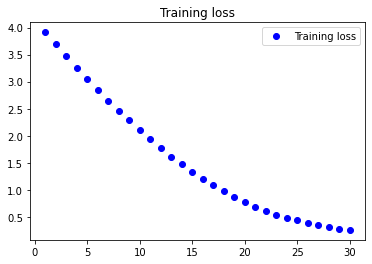

In [19]:
# 損失の推移
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss" )
plt.title("Training loss")
plt.legend()
plt.show()
plt.savefig("loss_by_word2vec.png")
plt.close()

In [20]:
# モデルと学習結果（パラメータ）の保存
json_string = model.to_json()
open('dialog_model_by_word2vec.json', 'w').write(json_string)
model.save('dialog_model_by_word2vec.h5')